<a href="https://colab.research.google.com/github/ArivCR7/HousePricePrediction/blob/master/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.set_style('darkgrid')
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load data

In [11]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.shape

(1460, 81)

In [6]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Separatig out independent and dependent variables

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Analysis on the target variable - **

SalePrice is the target variable here. Let's do some analsis on this variable. 

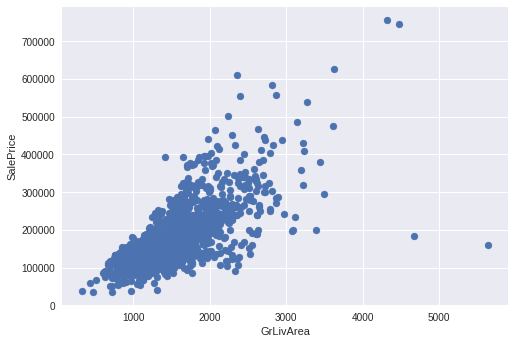

In [9]:
fig, ax = plt.subplots()
ax.scatter(train_data['GrLivArea'], target)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

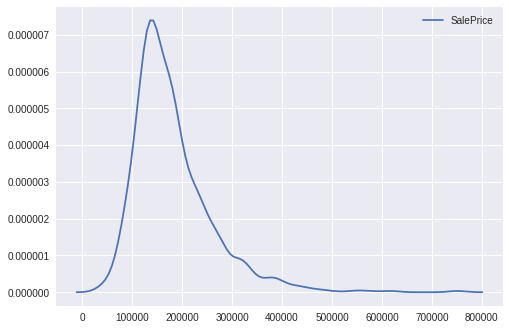

In [12]:
sns.kdeplot(train_data['SalePrice'])

In [13]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It looks like there is no abnormality in the target variable like some 0 values. Targt variable looks good.

Let's draw a heatmap to understand how features are correlated with our target variable.

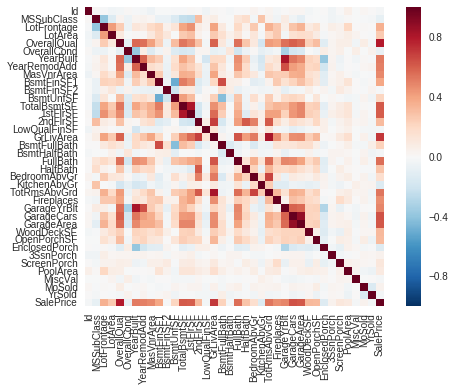

In [14]:
corrmat = train_data.corr()
fig, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

Let's focus only on the target variable: SalePrice. It seems following variables are highly correlated with this vaiable:
OverallQual, GrLivArea, GarageCars and GarageArea.

But note that, we'll be including theother features also while modelling. 

# Data Preprocessing and EDA

In [16]:
#Copy target variable and drop it from the dataframe
target = train_data['SalePrice']
train_data.drop('SalePrice', axis=1, inplace=True)

#Merging train and test set for data preprocessing
train_data['isTrain'] = True
test_data['isTrain'] = False
df_full = pd.concat([train_data, test_data])
df_full.shape

(2919, 81)

ID column is unnecessary. So dropping ID column in data.

In [17]:
train_ID = df_full[df_full['isTrain']==True]['Id']
test_ID  = df_full[df_full['isTrain']==False]['Id']

print(train_ID.shape, test_ID.shape)

df_full.drop('Id', axis=1, inplace=True)

(1460,) (1459,)


Let's examine the missing data proportion in each column

In [18]:
all_data_na = (df_full.isnull().sum()/len(df_full))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing data':all_data_na})
missing_data.head(20)

,Missing data
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


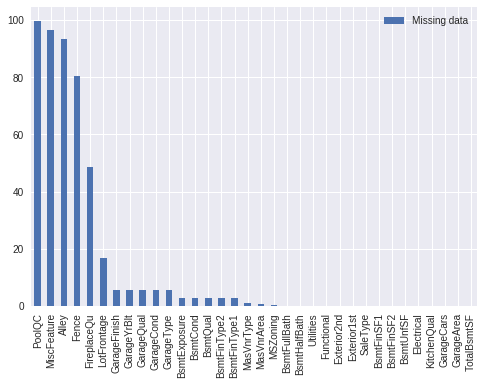

In [19]:
missing_data.plot.bar()

The above method of examining missing value proportion helps us in identifying the meaningful features. Usually if we don't visualize like this, we would end up imputing missing values in a feature which has ove 90% missing data. 
Let's xclude features that have large proportion of missing data.

A good feature should have handful of values and it's always a good practice to remove features that are 15% missing. So from the abov data, let's some some featuers. 

In [0]:
df_full.drop('PoolQC', axis=1, inplace=True)
df_full.drop('MiscFeature', axis=1, inplace=True)
df_full.drop('Alley', axis=1, inplace=True)
df_full.drop('Fence', axis=1, inplace=True)
df_full.drop('FireplaceQu', axis=1, inplace=True)
df_full.drop('LotFrontage', axis=1, inplace=True)

**Now let's impute missing data on the remaining colmns - **

First let's identify the datatype of all columns.

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

From the above information, it can be seen that if the datatype is object, it's a categorical feature. 

Strategy to impute missing value - 

For numeric variable - Use median
For categorical var - Use None.


In [0]:
numeric_variables = list(df_full.select_dtypes(include=['int64','float64']).columns.values)

df_full[numeric_variables] = df_full[numeric_variables].apply(lambda x: x.fillna(x.median()),axis=0)

In [0]:
categorical_variables = list(df_full.select_dtypes(exclude=['int64','float64']).columns.values)
df_full[categorical_variables] = df_full[categorical_variables].apply(lambda x: x.fillna('None'), axis=0)

Once again check the missing data proportions


In [24]:
all_data_na = (df_full.isnull().sum()/len(df_full))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing data':all_data_na})
missing_data.head(20)

,Missing data


Hurray!!! No missing data in our dataframe!!

Dummy Encoding - 

It's time to convert all our categorical data into onehot encoded variables. pd.get_dummies() help us to do that.

In [25]:
df_full = pd.get_dummies(df_full)
df_full.shape

(2919, 287)

As we can see, converting categorical data to OH data creates more features.

In [26]:
df_full.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


#Modelling

Let's first separate our data and do train_test_split on train data for evaluation.

In [27]:
from sklearn.model_selection import train_test_split
train_df = df_full[df_full['isTrain']==True]
train_df.drop('isTrain',axis=1, inplace=True)

test_df = df_full[df_full['isTrain']==False]
test_df.drop('isTrain', axis=1, inplace=True)

print(train_df.shape, test_df.shape)

(1460, 286) (1459, 286)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df, target, random_state=0)
print(X_train.shape, Y_train.shape)

(1095, 286) (1095,)


In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

**Model Evaluation - **


In [68]:
from sklearn.metrics import mean_squared_error, r2_score
test_mse = mean_squared_error(Y_pred, Y_test)
print(np.sqrt(test_mse))

r2 = r2_score(Y_test, Y_pred)
print(r2)

54616.198684815936
0.5481722576911556


**Using cross validation - **



In [0]:
from sklearn.model_selection import cross_val_score
lm2 = LinearRegression()
R2s = cross_val_score(lm2, X_train, Y_train, scoring='r2', cv=5)

In [74]:
R2s

array([0.84589311, 0.76804116, 0.90865924, 0.88391117, 0.88917298])

In [76]:
print(np.mean(R2s))

0.8591355307529115


List of scoring options in cross_val_score

In [71]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [61]:
MSEs

array([-8.59522715e+08, -1.61154375e+09, -6.61356963e+08, -7.59179177e+08,
       -4.94694042e+08])

In [64]:
mean_MSE = -np.mean(MSEs)
print(mean_MSE)
print(np.sqrt(mean_MSE))


877259329.1312885
29618.56392756557


**Ridge Regressor - **

In [95]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge_R2s = cross_val_score(ridge, X_train, Y_train, scoring='r2', cv=5)
print(ridge_R2s)

[0.86030529 0.77383909 0.91390195 0.88993546 0.89696229]


In [96]:
print(np.mean(ridge_R2s))

0.866988815539349


With Ridge Regressor, we get improved R2 value. 

Let's optimize the Ridge regressor with different values of alpha. Let's use GridSearch to find the best parameter.

In [0]:
from sklearn.model_selection import GridSearchCV

ridge2 = Ridge()

parameters = {'alpha':[1e-15, 1e-10, 1e-5, 1e-1, 0.2, 0.5, 1, 2, 5, 10, 20, 100]}

RidgeRegressor = GridSearchCV(ridge2, parameters, scoring='r2', cv=5)

In [98]:
RidgeRegressor.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.184682e-22
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.423984e-17
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.095506e-17
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.582628e-17
  overwrite_a=True).T


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [99]:
RidgeRegressor.best_params_

{'alpha': 5}

In [100]:
RidgeRegressor.best_score_

0.874102191305634

**Lasso Regressor**  - Accounts for both L2 and L1 regularizations

In [0]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha':[1e-15, 1e-10, 1e-5, 1e-1, 0.2, 0.5, 1, 2, 5, 10, 20, 100]}
lassoRegressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)


In [0]:
lassoRegressor.fit(X_train, Y_train)


In [103]:
print(lassoRegressor.best_params_, lassoRegressor.best_score_)

{'alpha': 100} 0.8801083564150395


# LinearRegressor Class - Vectorized

In [0]:
class LinearRegressor:
  
  def __init__(self):
    self.W = None
    self.B = 0
    
  def perceptron(self, X): #(1095x310)
    return(np.dot(X, self.W.T) + self.B) #(1095x310) * (310) -> [1095]

  
  def predict(self, X): #(1095x310)
    Y_pred = self.perceptron(X)
    #print('predict fn: ', Y_pred.shape)
    return(np.array(Y_pred).reshape(-1,1)) #[1095]
  
  def grad_mse(self, X, Y):
    self.dW = None
    self.dB = None
    
    Y_pred = self.predict(X) #[1095]
    Err = Y_pred - Y
    #print(Err.shape)
    #print('shape of Y: ', Y.shape)
    self.dW = np.matmul(Err.T, X) #[1095]*(1095x310)
    self.dB = np.sum((Y-Y_pred), axis=0) #1
    #print(self.dW.shape, self.dB.shape)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=True):
    
    if(initialize):
      self.W = np.random.randn(1,X.shape[1]) #(W->[310])
      self.B= 0
      
    if(display_loss):
      loss={}
    
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      self.grad_mse(X, Y)
           
      if(display_loss):
        Y_pred = self.predict(X)
        loss[epoch] = np.sqrt(mean_squared_error(Y_pred, Y))
        #print(loss[epoch])
      
      self.W -= learning_rate * self.dW
      self.B -= learning_rate * self.dB
      
    if(display_loss):
      plt.plot(loss.values())
      plt.title('Loss Curve')
      plt.xlabel('Epochs')
      plt.ylabel('MSE')
   
      
    

In [0]:
Y_train = Y_train.reshape(-1,1)
Y_train = Y_train/Y_train.max()

array([[0.14238411],
       [0.21192053],
       [0.19205298],
       [0.25449007],
       [0.2397351 ]])

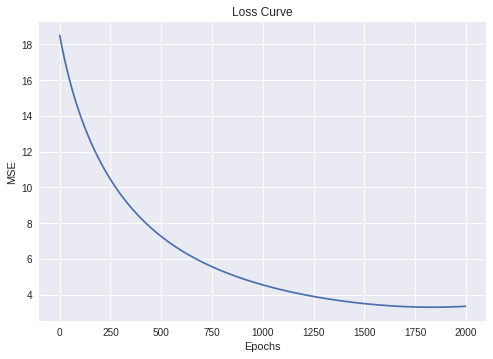

In [214]:
lin_Reg = LinearRegressor()
lin_Reg.fit(X_train_scaled, Y_train, epochs=2000, learning_rate=0.000001)

In [0]:
Y_train_pred = lin_Reg.predict(X_train)

In [223]:
Y_train.shape

(1095, 1)

In [231]:
Y_train_pred

array([[2538.08361185],
       [3066.37679492],
       [2134.22218692],
       ...,
       [4479.50758168],
       [ 866.43122103],
       [2573.27980329]])

# Linear Regressor Class - Scalar

In [0]:
class Scalar_LinearRegressor:
  
  def __init__(self):
    self.w = None
    self.b = 0
  
  def perceptron(self, x):
    return(np.dot(x, self.w.T) + self.b)
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      pred = self.perceptron(x)
      Y_pred.append(pred)
    return(np.array(Y_pred))
  
  def grad_mse_w(self, x, y):
    yhat = self.perceptron(x)
    return((yhat-y)*x)
  
  def grad_mse_b(self, x, y):
    yhat = self.perceptron(x)
    return((yhat-y))
  
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=True, initialize=True):
    
    if(initialize):
      self.w = np.random.randn(X.shape[1])
      self.b = 0
    
    if(display_loss):
      loss={}
    
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw += self.grad_mse_w(x, y)
        db += self.grad_mse_b(x, y)
          
      if(display_loss):
        Y_pred = self.predict(X)
        #print('Y_pred: ', Y_pred)
        loss[epoch] = mean_squared_error(Y, Y_pred)
        
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
    if(display_loss):
      plt.plot(loss.values())
      plt.show()
    
    
    

In [0]:
X_train = np.array(X_train)

In [173]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


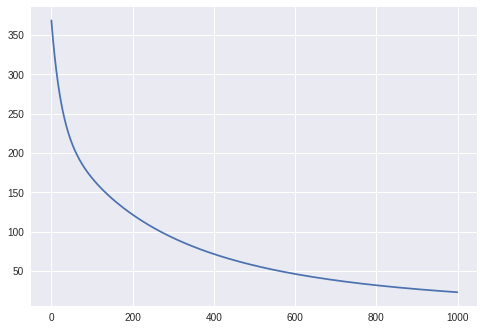

In [197]:
scalar_lm = Scalar_LinearRegressor()
scalar_lm.fit(X_train_scaled, Y_train, epochs=1000, learning_rate=0.000001)

# Support Vector Regression

In [29]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', degree=1)
svr.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
print(X_test.shape, Y_test.shape)
Y_test = Y_test.reshape(-1,1)

(365, 286) (365,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [35]:
print(svr.score(X_test, Y_test))

0.614142910429826


In [37]:
svr_pred = svr.predict(X_test)
print(r2_score(Y_test, svr_pred))

0.614142910429826


In [0]:
#Trying different kernel
svr2 = SVR(kernel='poly', epsilon=0.1)
svr2.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
print(svr2.score(X_test,Y_test))

-0.05459663759536992


In [0]:
pred = svr2.predict(X_test)
print(r2_score(Y_test, pred))